 # DOMINANT COLOR EXTRACTION FOR IMAGE SEGMENTATION

In [47]:
from sklearn.cluster import KMeans

Segmentation --Partitions the image into regions having similar visual appearance corresponding to the parts of objects

In [70]:
import cv2
img=cv2.imread("wp.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


In [71]:
print(img.shape)

(873, 1600, 3)


In [72]:
import matplotlib.pyplot as plt

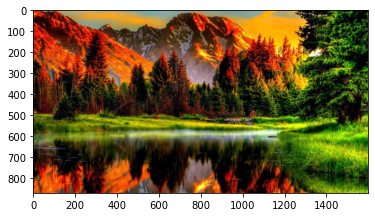

In [73]:
plt.imshow(img)
plt.show()

# Flatten each channel of the image


In [74]:
all_pixels=img.reshape((-1,3))

In [75]:
print(all_pixels.shape)

(1396800, 3)


In [76]:
dominant_colors=4
km = KMeans (n_clusters=dominant_colors)
km.fit(all_pixels)


KMeans(n_clusters=4)

# each pixel now will be allocated one color according to the mean of the clusters to which it is nearest to

In [77]:
km.cluster_centers_

array([[ 92.440957  ,  79.18615894,  23.36488004],
       [161.55108716, 166.91603677,  79.59620194],
       [228.07662082, 105.3885039 ,  15.79866669],
       [ 24.90449123,  20.4747757 ,   6.96251178]])

These cluster centers are nothing but the RGB values of the colors which K-Means have found that theses four colors are the most dominant

In [78]:
centers=km.cluster_centers_

In [79]:
import numpy as np
centers=np.array(centers,dtype="uint8")                # color values can be only positive

In [80]:
print(centers)

[[ 92  79  23]
 [161 166  79]
 [228 105  15]
 [ 24  20   6]]


# Plotting what all colors are these

Extracting color swatches

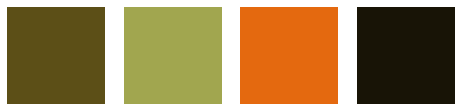

In [81]:
i=1
plt.figure(figsize=(8,2))
colors=[]
for each_color in centers:
    plt.subplot(1,4,i)               # 1 row , 4 columns and
    plt.axis("off")
    i+=1
    colors.append(each_color)
    
    # color swatch
    a=np.zeros((100,100,3),dtype="uint8")
    a[:,:,:]=each_color
    plt.imshow(a)
plt.show()    
    
    
    
    
    
    
    

# KMeans Image- Segmentation

# We will try to map every pixel with some values

In [82]:
new_img=np.zeros((873*1600,3),dtype="uint8")

In [83]:
print(new_img.shape)

(1396800, 3)


In [84]:
colors

[array([92, 79, 23], dtype=uint8),
 array([161, 166,  79], dtype=uint8),
 array([228, 105,  15], dtype=uint8),
 array([24, 20,  6], dtype=uint8)]

In [85]:
km.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [86]:
original_shape=img.shape

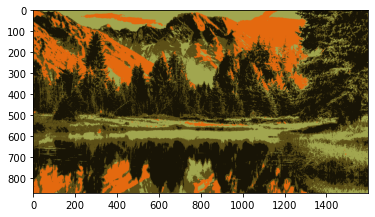

In [87]:

for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()